### Loading the Dataset

In [158]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (3).json


In [159]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [160]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [161]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: nxn


### Importing Libraries

In [162]:
!pip install kneed

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Explore the Dataset

In [164]:
df = pd.read_csv('Mall_Customers.csv')

In [165]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [166]:
df.shape

(200, 5)

In [167]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [169]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [170]:
df_new = df.copy()

In [171]:
df_new.drop(columns='CustomerID', inplace=True)

In [172]:
df_new.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [173]:
df_new['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


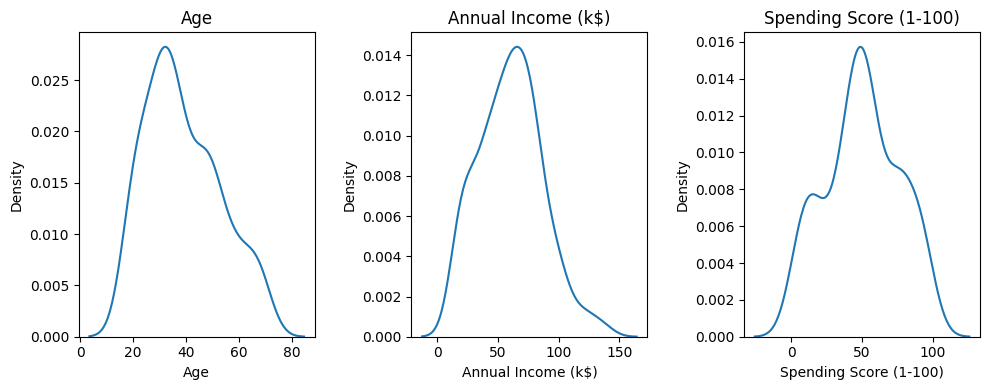

In [174]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.kdeplot(df_new['Age'], fill=False)
plt.title('Age')
plt.subplot(1,3,2)
sns.kdeplot(df_new['Annual Income (k$)'], fill=False)
plt.title('Annual Income (k$)')
plt.subplot(1,3,3)
sns.kdeplot(df_new['Spending Score (1-100)'], fill=False)
plt.title('Spending Score (1-100)')

plt.tight_layout(w_pad=2)
plt.show()

In [175]:
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    print(f"{col} Skewed: {df_new[col].skew()}")


Age Skewed: 0.48556885096681657
Annual Income (k$) Skewed: 0.3218425498619055
Spending Score (1-100) Skewed: -0.047220201374263374


### Scaling

In [176]:
df_scaled = df_new.copy()

In [177]:
df_scaled['Gender'] = df_scaled['Gender'].replace({'Male': 0, 'Female': 1})

/tmp/ipython-input-2006446160.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled['Gender'] = df_scaled['Gender'].replace({'Male': 0, 'Female': 1})


In [178]:
scalar = StandardScaler()
df_scaled[['Age', 'Annual Income (k$)', "Spending Score (1-100)"]] = scalar.fit_transform(df_scaled[['Age', 'Annual Income (k$)', "Spending Score (1-100)"]])

In [179]:
df_scaled = pd.DataFrame(df_scaled)

### Clustering
Without Dimensionally Reduction

In [180]:
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

In [181]:
wcss

[649.2800000000001,
 438.5224115567773,
 345.2050346991058,
 254.36171423484495,
 216.78490151651044,
 181.9514362434146,
 171.372660489438,
 153.29724063982405,
 142.71846488584754,
 133.3266400544609]

Text(0.5, 1.0, 'Elbow Method')

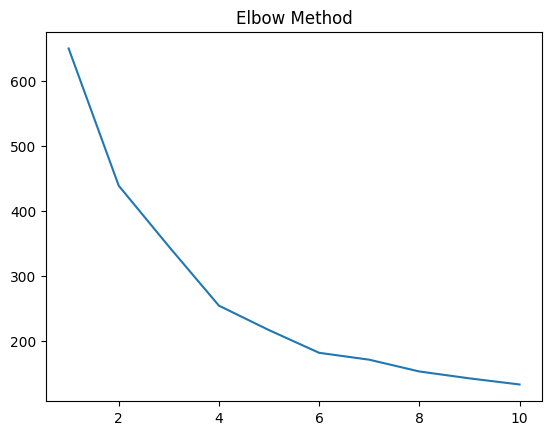

In [182]:
# Elbow method
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')

In [183]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit_predict(df_scaled)

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [184]:
y_labels = kmeans.fit_predict(df_scaled)

In [185]:
# Knee Locator for best best no. of clusters
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(4)

In [186]:
# performance matrix
silhouette_coefficients=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_scaled)
  score = silhouette_score(df_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

In [187]:
silhouette_coefficients

[np.float64(0.30319765641607566),
 np.float64(0.31200836318195724),
 np.float64(0.35044061449694197),
 np.float64(0.34977050035201074),
 np.float64(0.356485834425401),
 np.float64(0.3315513749667554),
 np.float64(0.336203797093241),
 np.float64(0.3117853954011984),
 np.float64(0.30866345259814115)]

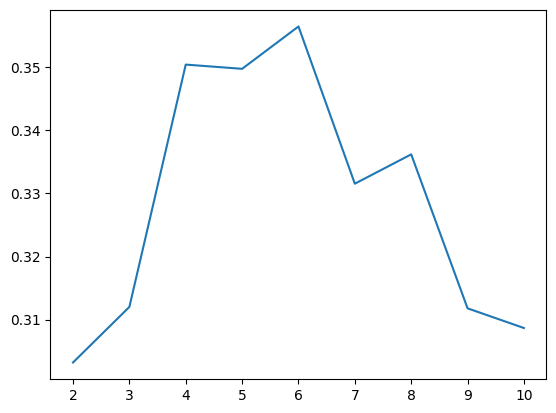

In [188]:
plt.plot(range(2,11), silhouette_coefficients)

very slight difference in scores with 4 and 6 clusters better to choose 4 clusters

### Clustering
With Dimensionally Reduction

In [189]:
pca = PCA(n_components=2)
df_extracted = pca.fit_transform(df_scaled)
pca.explained_variance_ratio_

array([0.4095285, 0.3081674])

In [190]:
wcss_2 =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_extracted)
  wcss_2.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

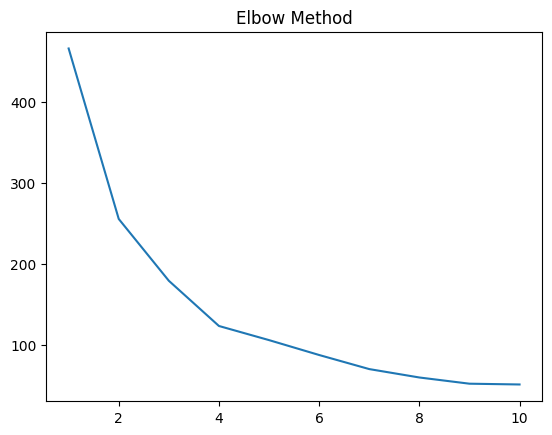

In [191]:
plt.plot(range(1,11), wcss_2)
plt.title('Elbow Method')

In [192]:
kl=KneeLocator(range(1,11),wcss_2,curve='convex',direction='decreasing')
kl.elbow

np.int64(4)

In [193]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_labels = kmeans.fit_predict(df_extracted)

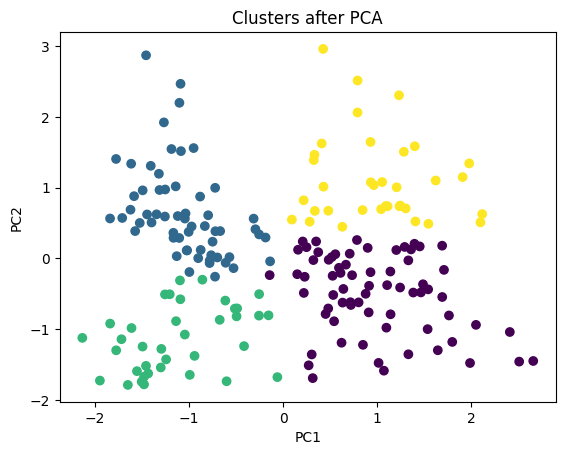

In [194]:
plt.scatter(df_extracted[:, 0], df_extracted[:, 1], c=y_labels, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters after PCA")
plt.show()

In [195]:
silhouette_coefficients=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_extracted)
  score = silhouette_score(df_extracted, kmeans.labels_)
  silhouette_coefficients.append(score)

In [196]:
silhouette_coefficients

[np.float64(0.42530948194519064),
 np.float64(0.4230177759668756),
 np.float64(0.42325846739759093),
 np.float64(0.39160714406590585),
 np.float64(0.37439976415321735),
 np.float64(0.3804484453447523),
 np.float64(0.3914626141356606),
 np.float64(0.38600999212651116),
 np.float64(0.3633224299833928)]

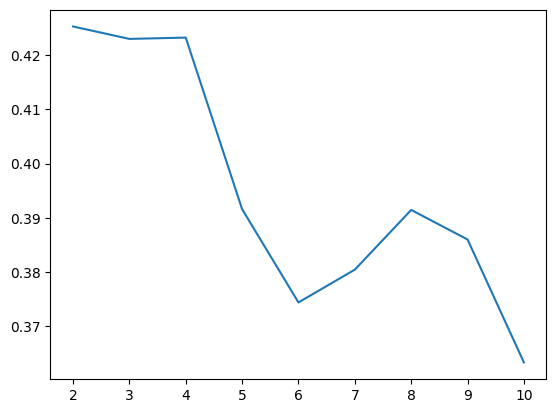

In [197]:
plt.plot(range(2,11), silhouette_coefficients)

# ***Conclusion***

After applying clustering techniques on the Mall Customers dataset, I compared different numbers of clusters using both the Elbow/Knee method and the Silhouette score.

The Silhouette score suggested that 2 clusters provided the best separation.

However, the Elbow method indicated that 4 clusters is the optimal balance between cohesion and separation.

From a business perspective, 4 clusters are more meaningful, as they can represent different customer segments such as low spenders, average spenders, and high spenders.

Therefore, I chose 4 clusters as the final solution